In [7]:
import matplotlib.pyplot as plt
from IPython import display
import pandas as pd
import random
import math
import numpy as np
from scipy.signal import savgol_filter

df = pd.read_csv('data.csv')
df.head()

X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()

In [12]:
# weights
W = [random.random(), random.random()]
# bias
b = random.random()

print(f"Weights: {W}, Bias: {b}")

lr = 0.03
theta = 0.5

Weights: [0.15949484654306978, 0.6023253599249432], Bias: 0.26407630186870445


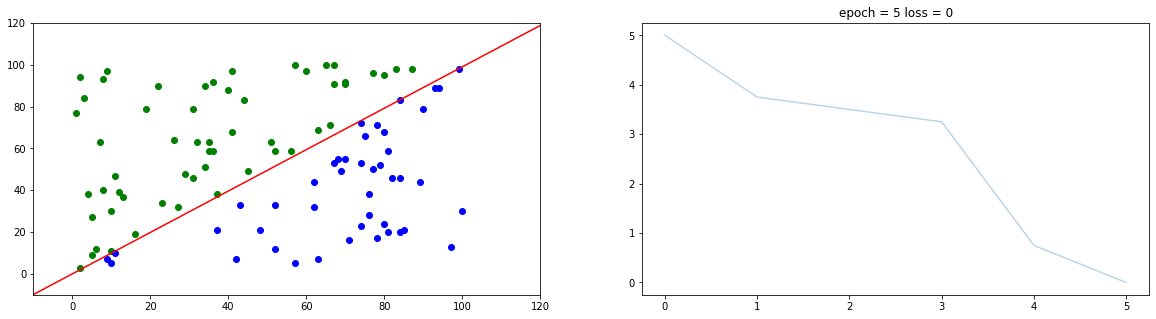

In [13]:
epoch = 0
count = 0
loss = []

while count < len(X1):
    total_err = 0
    for i in range(len(X1)):
        weighted_sum = W[0] * X1[i] + W[1] * X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error = Y[i] - pred
        if error != 0:
            count = 0
            total_err += math.sqrt(error ** 2)

            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b += lr * error
        else:
            count += 1
    
    loss.append(1/4 * total_err)

    plt.figure(figsize = (20, 5))
    display.clear_output(wait = True)
    plt.subplot(1, 2, 1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "bo")
        else:
            plt.plot(X1[i], X2[i], "go")

    plt.xlim([-10, 120])
    plt.ylim([-10, 120])
        
    xint = (theta - b) / W[0]
    yint = (theta - b) / W[1]

    slope = -yint / xint
    x = plt.xlim()

    yeq = []
    for i in x:
        yeq.append(slope * i + yint)
    plt.plot(x, yeq, 'r')

    plt.subplot(1, 2, 2)
    plt.plot(loss, alpha = 0.3)
    if epoch > 10:
        avg = savgol_filter(loss, 11, 3)
        plt.plot(avg, 'r--', lw = 5)

    plt.title(f"epoch = {epoch} loss = {total_err}")
    plt.show()
    epoch += 1